# Stock trading

You are given the price of a stock for $n$ days. Your task is to figure out the highest profit you could have made, if you could have bought and sold the stock at most twice.

At any time, you may hold at most one share of the stock. If you buy again after selling, there must be at least one day of no shares held in between the sale and the following buy.

The time complexity of the algorithm should be $O(n)$.

In a file `trading.py`, implement a function `find` that returns the desired result.

In [ ]:
def find(t):
    # TODO

if __name__ == "__main__":
    print(find([1,5,2,1,5])) # 8
    print(find([1,5,1,5])) # 4
    print(find([1,2,3,4,5])) # 4
    print(find([5,4,3,2,1])) # 0
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10

*Explanation*: When the prices are $[1,5,2,1,5]$, the profit $8$ is earned by twice buying at the price $1$ and selling at the price $5$. When the prices are $[1,5,1,5]$, this is no more possible because there must be one day between the first sell and the second buy. Thus you can get the profit $4$ only once.

### Analysis

In [17]:
def find(t):
    n = len(t)
    mat = [[t[i] for i in range(j, n)] for j in range(n) ]
    profit_mat = []
    for i in range(1, len(mat)):
        profit_row = []
        for j in range(len(mat[i])):
            profit = max(mat[i][j] - mat[0][j], 0)
            profit_row.append(profit)
        profit_mat.append(profit_row)
    print(*mat, sep='\n')
    print(*profit_mat, sep='\n')

if __name__ == "__main__":
    print(find([4,3,1,3,5,1,4])) # 5

[4, 3, 1, 3, 5, 1, 4]
[3, 1, 3, 5, 1, 4]
[1, 3, 5, 1, 4]
[3, 5, 1, 4]
[5, 1, 4]
[1, 4]
[4]
[0, 0, 2, 2, 0, 3]
[0, 0, 4, 0, 0]
[0, 2, 0, 1]
[1, 0, 3]
[0, 1]
[0]
None


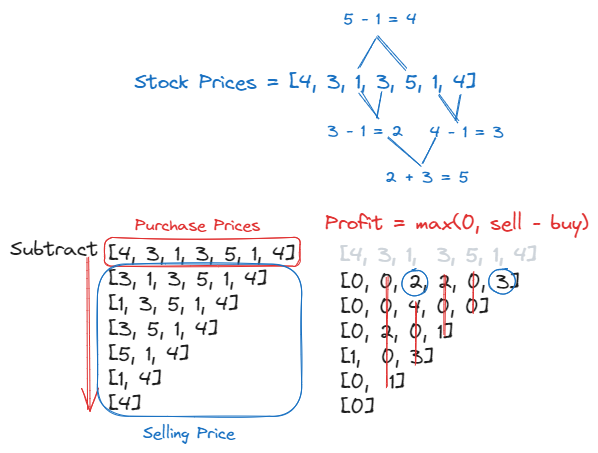

In [16]:
def find(t):
    n = len(t)
    mat = [[t[i] for i in range(j, n)] for j in range(n) ]
    profit_mat = []
    for i in range(1, len(mat)):
        profit_row = []
        for j in range(len(mat[i])):
            profit = max(mat[i][j] - mat[0][j], 0)
            profit_row.append(profit)
        profit_mat.append(profit_row)
    print(*mat, sep="\n")
    print(*profit_mat, sep='\n')

if __name__ == "__main__":
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10

[4, 2, 5, 8, 7, 6, 1, 2, 5, 1]
[2, 5, 8, 7, 6, 1, 2, 5, 1]
[5, 8, 7, 6, 1, 2, 5, 1]
[8, 7, 6, 1, 2, 5, 1]
[7, 6, 1, 2, 5, 1]
[6, 1, 2, 5, 1]
[1, 2, 5, 1]
[2, 5, 1]
[5, 1]
[1]
[0, 3, 3, 0, 0, 0, 1, 3, 0]
[1, 6, 2, 0, 0, 0, 4, 0]
[4, 5, 1, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 3, 0]
[1, 0]
[0]
None


### Incorrect Attempts

In [10]:
def find(t):
    lowest = lowest_prev = t[0]
    best = 0
    best_index = lowest_index = lowest_index_prev = -1
    n = len(t)
    for i in range(n):
        if t[i] < lowest:
            lowest = t[i]
            lowest_index = i
        profit = t[i] - lowest
        if profit > best:
            lowest_prev, lowest_index_prev = lowest, lowest_index
            best, best_index = profit, i
            
    j = best_index + 2
    best2 = 0
    if n - j > 1 and best > 0:
        lowest = t[j]
        for i in range(j, n):
            lowest = min(lowest, t[i])
            best2 = max(best2, t[i] - lowest)
    
    k = lowest_index_prev - 1
    best3 = 0
    if k > 1 and best > 0:
        lowest = t[0]
        for i in range(k):
            lowest = min(lowest, t[i])
            best3 = max(best3, t[i] - lowest)
        
    return best + max(best2, best3)

if __name__ == "__main__":
    print(find([1,5,2,1,5])) # 8
    print(find([1,5,1,5])) # 4
    print(find([1,2,3,4,5])) # 4
    print(find([5,4,3,2,1])) # 0
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10

8
4
4
0
10


In [11]:
def find(t):
    lowest = lowest_prev = [t[0], -1]
    best = [0, -1]
    n = len(t)
    for i, price in enumerate(t):
        if price < lowest[0]:
            lowest = [price, i]
        profit = price - lowest[0]
        if profit > best[0]:
            lowest_prev = lowest
            best = [profit, i]
            
    j = best[1] + 2
    best_left = 0
    if n - j > 1 and best[0] > 0:
        lowest = t[j]
        for i in range(j, n):
            lowest = min(lowest, t[i])
            best_left = max(best_left, t[i] - lowest)
    
    k = lowest_prev[1] - 1
    best_right = 0
    if k > 1 and best[0] > 0:
        lowest = t[0]
        for i in range(k):
            lowest = min(lowest, t[i])
            best_right = max(best_right, t[i] - lowest)
        
    return best[0] + max(best_left, best_right)

if __name__ == "__main__":
    print(find([1,5,2,1,5])) # 8
    print(find([1,5,1,5])) # 4
    print(find([1,2,3,4,5])) # 4
    print(find([5,4,3,2,1])) # 0
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10
    print(find([4,8,3,2,5,8,7,6,1,2,5,1])) # 10

8
4
4
0
10
10


In [12]:
def find(t):
    lowest = lowest_prev = [t[0], -1]
    best = [0, -1]
    n = len(t)
    for i, price in enumerate(t):
        if price < lowest[0]:
            lowest = [price, i]
        profit = price - lowest[0]
        if profit > best[0]:
            lowest_prev = lowest
            best = [profit, i]
            
    j = best[1] + 2
    best_left = 0
    if n - j > 1 and best[0] > 0:
        lowest = t[j]
        for i in range(j, n):
            lowest = min(lowest, t[i])
            best_left = max(best_left, t[i] - lowest)
    
    k = lowest_prev[1] - 1
    best_right = 0
    if k > 1 and best[0] > 0:
        lowest = t[0]
        for i in range(k):
            lowest = min(lowest, t[i])
            best_right = max(best_right, t[i] - lowest)
        
    return best[0] + max(best_left, best_right)

if __name__ == "__main__":
    print(find([1,5,2,1,5])) # 8
    print(find([1,5,1,5])) # 4
    print(find([1,2,3,4,5])) # 4
    print(find([5,4,3,2,1])) # 0
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10
    print(find([4,8,3,2,5,8,7,6,1,2,5,1])) # 10
    print(find([4, 3, 1, 3, 5, 1, 4])) # 5

8
4
4
0
10
10
4


### Attempt 1

The core logic of the `find` algorithm is designed to calculate the maximum profit that can be made by buying and selling a stock at most twice, with the constraint that there must be at least one day of no stock holding between the two transactions. Here's a summary of the algorithm's logic:

1. **Initialization**: If the list of prices has fewer than two elements, the function returns `0` as no transactions can be made. It initializes variables to track the maximum profit after the first and second buy (`first_buy`, `second_buy`) and sell (`first_sell`, `second_sell`) transactions, as well as a variable `rest` to track the profit after a day of rest.

2. **Iteration**: The algorithm iterates through the list of stock prices starting from the second day.

3. **Profit Tracking**:
   - **Second Sell**: Updates the `second_sell` profit to the maximum of its current value or the `second_buy` profit plus the current price.
   - **Second Buy**: Updates the `second_buy` profit to the maximum of its current value or the `rest` profit minus the current price.
   - **Rest**: Sets the `rest` profit to the `first_sell` profit, enforcing the one-day gap after selling before buying again.
   - **First Sell**: Updates the `first_sell` profit to the maximum of its current value or the `first_buy` profit plus the current price.
   - **First Buy**: Updates the `first_buy` profit to the maximum of its current value or the negative of the current price (representing a purchase).

4. **Result**: After iterating through all the prices, the function returns the maximum of the `first_sell` and `second_sell` profits, which represents the maximum profit achievable under the given constraints.

The algorithm ensures that the second transaction (buying and selling) only occurs after a day of rest following the first sell, as indicated by the use of the `rest` variable. This approach allows the algorithm to consider all possible combinations of two transactions while adhering to the one-day gap rule.

The time complexity of the algorithm is **O(n)**, where `n` is the number of days, because it processes each day's price exactly once. The space complexity is **O(1)**, as it uses a fixed number of variables regardless of the input size. This makes the algorithm efficient for processing even large lists of stock prices.

In [9]:
def find(prices):
    if len(prices) < 2:
        return 0

    # Initialize the profits array
    n = len(prices)
    first_buy = second_buy = -prices[0]
    first_sell = second_sell = 0
    rest = 0  # Profit after resting for a day

    for i in range(1, n):
        # Update the second sell/buy only if there's at least one day gap
        second_sell = max(second_sell, second_buy + prices[i])
        second_buy = max(second_buy, rest - prices[i])
        rest = first_sell  # Resting on the i-th day, using the profit from the first sell
        first_sell = max(first_sell, first_buy + prices[i])
        first_buy = max(first_buy, -prices[i])

    return max(first_sell, second_sell)

# Test cases
if __name__ == "__main__":
    print(find([1,5,2,1,5])) # 8
    print(find([1,5,1,5])) # 4
    print(find([1,2,3,4,5])) # 4
    print(find([5,4,3,2,1])) # 0
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10
    print(find([4,3,1,3,5,1,4])) # 5

8
4
4
0
10
5


In [10]:
def find(t):
    if len(t) < 2:
        return 0

    n = len(t)
    fb = sb = -t[0]
    fs = ss = 0
    rest = 0 

    for i in range(1, n):
        ss = max(ss, sb + t[i])
        sb = max(sb, rest - t[i])
        rest = fs 
        fs = max(fs, fb + t[i])
        fb = max(fb, -t[i])

    return max(fs, ss)

if __name__ == "__main__":
    print(find([1,5,2,1,5])) # 8
    print(find([1,5,1,5])) # 4
    print(find([1,2,3,4,5])) # 4
    print(find([5,4,3,2,1])) # 0
    print(find([4,2,5,8,7,6,1,2,5,1])) # 10
    print(find([4,3,1,3,5,1,4])) # 5

8
4
4
0
10
5


### Solution

The following solution first computes a list `profit`, where the value `profit[i]` is the maximum profit from buying and selling once during the first `i+1` days.

Then a second loop computes the maximum profit from buying and selling twice. The variable `min_second` tells the smallest amount of money spent after buying, selling and buying again during the first `i+1` days. The amount could be negative. This is then subtracted from the proceeds of selling on the day `i` to obtain the maximum profit from two buys and sales with the last sale occurring on the day `i`.

In [ ]:
def find(t):
    n = len(t)
    result = 0

    min_first = t[0]
    first_profit = 0
    profits = []

    for i in range(n):
        min_first = min(min_first, t[i])
        first_profit = max(first_profit, t[i] - min_first)
        result = max(result, first_profit)
        profits.append(first_profit)

    if n <= 4:
        return result

    min_second = t[2]
    second_profit = 0

    for i in range(2, n):
        min_second = min(min_second, t[i] - profits[i - 2])
        second_profit = max(second_profit, t[i] - min_second)
        result = max(result, second_profit)

    return result